### GDP Analysis

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

### Validating the working directory

In [2]:
#validating the working directory
from os import chdir, getcwd
wd=getcwd()
wd
chdir(wd)
wd

'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh'

#### Part-I: GDP Analysis of the Indian States

### Fetching all the csv files from GSVA folder

In [98]:
# Dataset consists of the GSDP (Gross State Domestic Product) data for the states and union territories.
gsdp_data= pd.read_csv('ab40c054-5031-4376-b52e-9813e776f65e.csv',encoding=' ISO-8859-1')
#_____________________________________________________________________________________________
# C:\Users\namro\Desktop\GDP Analysis_Namrota Ghosh\GSVA----> Path for all GSVA files of states

path=r'C:\Users\namro\Desktop\GDP Analysis_Namrota Ghosh\GSVA'
gsva_files=glob.glob(path+'/*.csv')
gsva_files

['C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Andaman_Nicobar_Islands-GSVA_cur_2014-15.csv',
 'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv',
 'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv',
 'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Assam-GSVA_cur_2015-16.csv',
 'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Bihar-GSVA_cur_2015-16.csv',
 'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Chandigarh-GSVA_cur_2015-16.csv',
 'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Chhattisgarh-GSVA_cur_2016-17.csv',
 'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Delhi-GSVA_cur_2016-17.csv',
 'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Goa-GSVA_cur_2015-16.csv',
 'C:\\Users\\namro\\Desktop\\GDP Analysis_Namrota Ghosh\\GSVA\\NAD-Gujarat-GSVA_cur_201

In [4]:
gsva_files[0].split('\\')[-1].split('.')[0].split('-')[1] ## Splitting just the state name from the files

'Andaman_Nicobar_Islands'

### Creating a concatenated dataframe for all the GSVA csv files

In [5]:
li=list()
for files in gsva_files:
    df=pd.read_csv(files,encoding=' ISO-8859-1')
    df=df[['Item','2014-15']]
    df=df.T
    df.columns=df.iloc[0]
    df=df[1:]
    df['State']=files.split('\\')[-1].split('.')[0].split('-')[1]
    #df.head()
    li.append(df)



### Understanding the Data

In [6]:
gsva_data=pd.concat(li,axis=0,ignore_index=True,sort=False)
gsva_data

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
0,76670,34026,19560,4634,18451,18738,95409,6650,30607,69302,...,11504,13916,572094,4120,138858,Andaman_Nicobar_Islands,NaN,NaN,NaN,NaN
1,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,...,5512100,1690800,52646842,501510,104977,Andhra_Pradesh,NaN,NaN,NaN,NaN
2,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,...,70099,30272,1676119,14870,112718,Arunachal_Pradesh,NaN,NaN,NaN,NaN
3,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,...,1725309,582406,19809800,326780,60621,Assam,NaN,NaN,NaN,NaN
4,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,...,3213546,2006421,37391988,1101240,33954,Bihar,NaN,NaN,NaN,NaN
5,16233,1659,13992,388,194,179,16412,149631,29741,133321,...,52622,23309,2784426,11120,250398,Chandigarh,NaN,NaN,NaN,NaN
6,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,2601791,1332092,23498180,270530,86860,Chhattisgarh,NaN,NaN,NaN,NaN
7,250568,64959,183770,861,978,963777,1214345,2749307,971255,2048788,...,6611719,392546,49242422,179690,274041,Delhi,NaN,NaN,NaN,NaN
8,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,527279,61854,4063307,14950,271793,Goa,NaN,NaN,NaN,NaN
9,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,Gujarat,2.74416e+06,NaN,NaN,NaN


##### Return a tuple representing the (rows,columns) of the DataFrame.

In [7]:
gsdp_data.shape     # For GSDP Dataset

(11, 36)

In [8]:
gsdp_data.shape    # For GSVA dataset

(11, 36)

##### Returns a summary of the dataframe

In [9]:
gsdp_data.info()  # For GSDP dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

In [10]:
gsva_data.info()  # For GSVA dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 38 columns):
Agriculture, forestry and fishing                                       32 non-null object
Crops                                                                   32 non-null object
Livestock                                                               32 non-null object
Forestry and logging                                                    32 non-null object
Fishing and aquaculture                                                 32 non-null object
Mining and quarrying                                                    31 non-null object
Primary                                                                 32 non-null object
Manufacturing                                                           32 non-null object
Electricity, gas, water supply & other utility services                 32 non-null object
Construction                                                            32 non

##### Verifying all the columns

In [11]:
gsdp_data.columns  # For GSDP Dataset

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal1', 'Andaman & Nicobar Islands',
       'Chandigarh', 'Delhi', 'Puducherry', 'All_India GDP'],
      dtype='object')

In [12]:
gsva_data.columns  # For GSVA Dataset

Index(['Agriculture, forestry and fishing', 'Crops', 'Livestock',
       'Forestry and logging', 'Fishing and aquaculture',
       'Mining and quarrying', 'Primary', 'Manufacturing',
       'Electricity, gas, water supply & other utility services',
       'Construction', 'Secondary', 'Trade, repair, hotels and restaurants',
       'Trade & repair services', 'Hotels & restaurants',
       'Transport, storage, communication & services related to broadcasting',
       'Railways', 'Road transport', 'Water transport', 'Air transport',
       'Services incidental to transport', 'Storage',
       'Communication & services related to broadcasting',
       'Financial services',
       'Real estate, ownership of dwelling & professional services',
       'Public administration', 'Other services', 'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       'Population ('00)', 'Per Capita GSDP (Rs.)', 'State',
       '

##### Analyzing the data with statistical summary

In [13]:
gsdp_data.describe()  # For GSDP Dataset

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
count,11.000000,9.000000,9.000000,9.000000,11.000000,9.000000,9.000000,11.000000,7.000000,9.000000,...,11.000000,7.000000,9.000000e+00,9.000000,0.0,7.000000,9.000000,11.000000,11.000000,1.100000e+01
mean,280986.561818,8201.516667,100018.167778,181565.673333,120748.879091,22450.120000,448568.674444,228667.271818,50673.064286,53343.001111,...,268570.787273,13739.691429,5.209237e+05,82588.947778,NaN,2759.814286,13707.002222,258693.004545,12527.435455,6.479952e+06
std,282573.532407,8073.276061,97589.497456,178700.497677,120928.480448,21443.429799,438025.627165,228195.895576,48384.121107,51712.668467,...,268734.549079,13240.797263,5.087288e+05,80553.858327,NaN,2627.016700,13399.003286,258176.516280,12445.889343,6.433000e+06
min,8.430000,12.070000,9.560000,10.590000,10.980000,-10.020000,10.820000,9.180000,10.140000,4.700000,...,11.700000,12.780000,1.051000e+01,8.120000,NaN,10.890000,8.840000,10.960000,10.140000,9.990000e+00
25%,14.025000,14.790000,13.190000,14.250000,12.995000,10.750000,11.470000,14.135000,14.155000,11.310000,...,12.840000,17.030000,1.365000e+01,13.650000,NaN,13.905000,14.710000,13.095000,11.815000,1.224500e+01
50%,379402.000000,11063.000000,143175.000000,247144.000000,158074.000000,35921.000000,615606.000000,297539.000000,72720.000000,78254.000000,...,359433.000000,19208.000000,7.240490e+05,115523.000000,NaN,3979.000000,18768.000000,343767.000000,16818.000000,8.736039e+06
75%,495370.000000,14602.000000,177745.000000,317101.000000,220836.000000,40633.000000,807623.000000,419062.000000,88792.000000,95893.000000,...,481682.000000,23628.000000,9.441460e+05,149817.000000,NaN,4790.000000,24787.000000,468103.500000,22979.500000,1.183519e+07
max,699307.000000,18784.000000,224234.000000,413503.000000,290140.000000,45002.000000,994316.000000,547396.000000,104369.000000,118387.000000,...,654294.000000,29667.000000,1.153795e+06,184091.000000,NaN,5721.000000,30304.000000,622385.000000,29557.000000,1.525103e+07


In [14]:
gsva_data.describe()  # For GSVA Dataset

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
count,32.0,32.0,32.0,32.0,32.0,31.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,32.0,32.0,32,3.0,1,1,1.0
unique,32.0,32.0,32.0,32.0,32.0,31.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,32.0,32.0,32,3.0,1,1,1.0
top,16235647.0,64959.0,13992.0,352254.0,704319.0,2117218.0,225598.0,149631.0,3409983.0,165819.0,...,2601791.0,1332092.0,10040446.0,20550.0,73979.0,Mizoram,2744163.0,7763847,2761427,307147.0
freq,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1,1.0,1,1,1.0


#### Part I-A:

###### GSDP files has missing values for few of the states. The NaN values won't be imputed because filling it with mean would not be accurate. <br>As the data may have biased results. It cannot be filled with median due to lesser number of data. <br>Also cannot be filled with 0 as this would be logically wrong. So, moving ahead without any imputations.

In [15]:
gsdp_data.columns=[col.strip() for col in gsdp_data.columns]  #Stripping off extra spaces from column_names,if any.

In [16]:
gsdp_data=gsdp_data.dropna(axis=1, how='all')
gsdp_data   # Dropping off all the columns having values all NaN, in this case it is West Bengal.

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,1338766.00,654294.00,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [17]:
# The problem statement requires to be worked with only states so filtering out the UTs.
union_territories=gsdp_data[['Delhi','Chandigarh','Puducherry','Andaman & Nicobar Islands','Jammu & Kashmir']]
union_territories

,Delhi,Chandigarh,Puducherry,Andaman & Nicobar Islands,Jammu & Kashmir
0,343767.00,18768.00,16818.00,3979.00,78254.00
1,391238.00,21609.00,18875.00,4421.00,87105.00
2,443783.00,24787.00,21870.00,5159.00,95893.00
3,492424.00,27844.00,24089.00,5721.00,100404.00
4,551963.00,30304.00,26533.00,NaN,118387.00
5,622385.00,NaN,29557.00,NaN,NaN
6,13.81,15.14,12.23,11.13,11.31
7,13.43,14.71,15.87,16.68,10.09
8,10.96,12.33,10.14,10.89,4.70
9,12.09,8.84,10.15,NaN,17.91


In [18]:
# The following code extracts only the states, leaving out the UTs and storing it in gsdp_data.
cols = [col for col in gsdp_data.columns if col not in union_territories]
gsdp_data = gsdp_data[cols]


In [19]:
gsdp_data

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,227872.00,266628.00,436465.00,11165.00,751485.00,359433.00,19208.00,724049.00,115523.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,258275.00,297734.00,494004.00,12338.00,855481.00,401493.00,21663.00,822903.00,131835.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,291709.00,334714.00,549701.00,13862.00,971090.00,452186.00,25593.00,944146.00,149817.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,321971.00,368011.00,612194.00,15209.00,1092564.00,511178.00,29667.00,1043371.00,161985.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,341887.00,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,378991.00,NaN,NaN,NaN,1338766.00,654294.00,NaN,NaN,NaN,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


##### Plot a graph for rows " % Growth over previous year" for all the states (not union territories) whose data is available, use as much data as possible for this exercise. Use the best fit line to represent the growth for each state.

In [20]:
# For our own ease we would be extracting the required rows & columns.
states_plot = gsdp_data.iloc[[6,7,8,9,10]]
# Now assuming that 2012-13: 1, 2013-14: 2, 2014-15: 3, 2015-16: 4, and 2016-17: 5 for plotting the records correctly
l=[1,2,3,4,5] 
states_plot.insert(2, "Duration1", [1,2,3,4,5], True) 
states_plot


,Items Description,Duration,Duration1,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,(% Growth over previous year),2012-13,1,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,2,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,3,13.40,14.79,11.45,17.92,13.69,13.12,10.82,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,4,15.85,12.07,13.19,10.59,10.98,10.75,11.09,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,(% Growth over previous year),2016-17,5,14.65,NaN,NaN,NaN,11.26,NaN,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


In [21]:
states_plot.columns

Index(['Items  Description', 'Duration', 'Duration1', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'All_India GDP'],
      dtype='object')

In [22]:
states_plot[list(states_plot.columns)[3:]]
#X=states_plot[list(states_plot.columns)[2]]

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,15.77,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,7.92,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,15.14,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,11.44,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,14.65,NaN,NaN,NaN,11.26,NaN,NaN,12.82,NaN,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


In [23]:
sns.set(style="ticks")

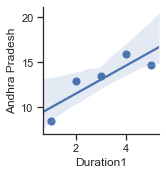

In [24]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Duration1", y="Andhra Pradesh", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

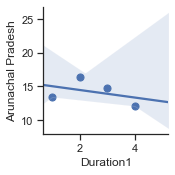

In [25]:
sns.lmplot(x="Duration1", y="Arunachal Pradesh", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

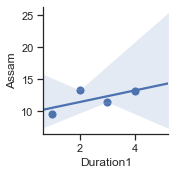

In [26]:
sns.lmplot(x="Duration1", y="Assam", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

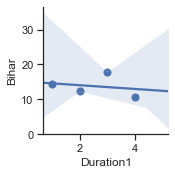

In [27]:
sns.lmplot(x="Duration1", y="Bihar", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

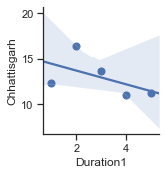

In [28]:
sns.lmplot(x="Duration1", y="Chhattisgarh", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

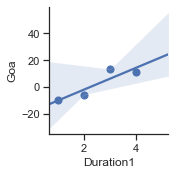

In [29]:
sns.lmplot(x="Duration1", y="Goa", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

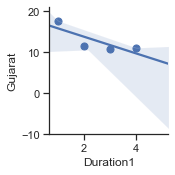

In [30]:
sns.lmplot(x="Duration1", y="Gujarat", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

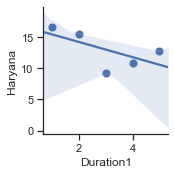

In [31]:
sns.lmplot(x="Duration1", y="Haryana", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

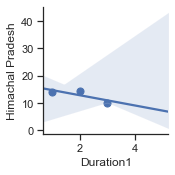

In [32]:
sns.lmplot(x="Duration1", y="Himachal Pradesh", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

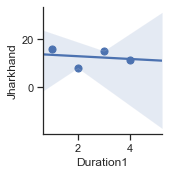

In [33]:
sns.lmplot(x="Duration1", y="Jharkhand", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

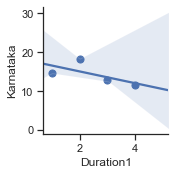

In [34]:
sns.lmplot(x="Duration1", y="Karnataka", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

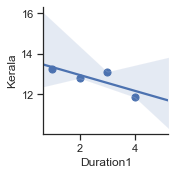

In [35]:
sns.lmplot(x="Duration1", y="Kerala", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

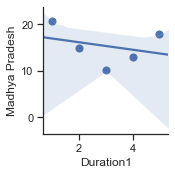

In [36]:
sns.lmplot(x="Duration1", y="Madhya Pradesh", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

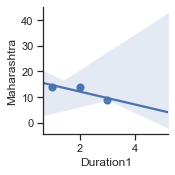

In [37]:
sns.lmplot(x="Duration1", y="Maharashtra", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

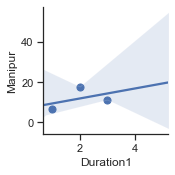

In [38]:
sns.lmplot(x="Duration1", y="Manipur", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

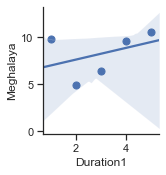

In [39]:
sns.lmplot(x="Duration1", y="Meghalaya", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

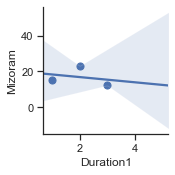

In [40]:
sns.lmplot(x="Duration1", y="Mizoram", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

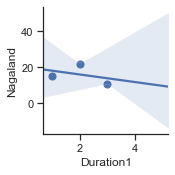

In [41]:
sns.lmplot(x="Duration1", y="Nagaland", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

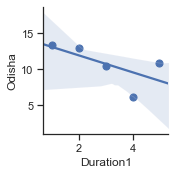

In [42]:
sns.lmplot(x="Duration1", y="Odisha", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

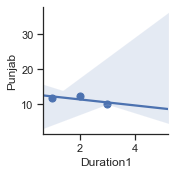

In [43]:
sns.lmplot(x="Duration1", y="Punjab", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

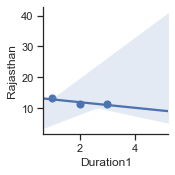

In [44]:
sns.lmplot(x="Duration1", y="Rajasthan", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

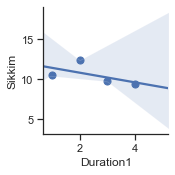

In [45]:
sns.lmplot(x="Duration1", y="Sikkim", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

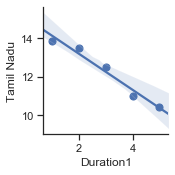

In [46]:
sns.lmplot(x="Duration1", y="Tamil Nadu", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

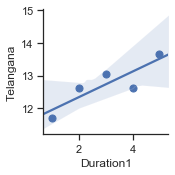

In [47]:
sns.lmplot(x="Duration1", y="Telangana", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

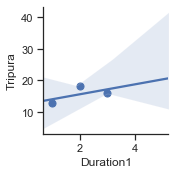

In [48]:
sns.lmplot(x="Duration1", y="Tripura", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

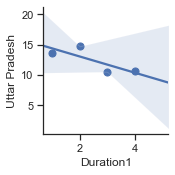

In [49]:
sns.lmplot(x="Duration1", y="Uttar Pradesh", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

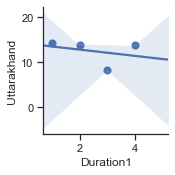

In [50]:
sns.lmplot(x="Duration1", y="Uttarakhand", data=states_plot, height=2.6,
           scatter_kws={"s": 50, "alpha": 1})

##### Draw a similar line graph for the nation as well.

In [51]:
states_plot # We are using this DataFrame to plot a line graph for the %growth of nation.

,Items Description,Duration,Duration1,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,(% Growth over previous year),2012-13,1,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,2,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,3,13.40,14.79,11.45,17.92,13.69,13.12,10.82,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,4,15.85,12.07,13.19,10.59,10.98,10.75,11.09,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99
10,(% Growth over previous year),2016-17,5,14.65,NaN,NaN,NaN,11.26,NaN,NaN,...,10.85,NaN,NaN,NaN,10.40,13.67,NaN,NaN,NaN,11.52


Text(0, 0.5, '% Growth')

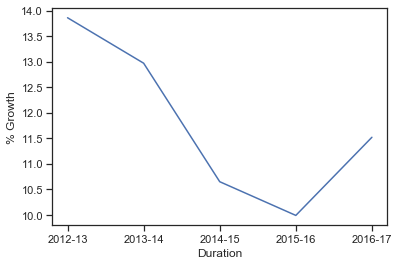

In [52]:
x=states_plot.iloc[[0,1,2,3,4],1]
y=states_plot.iloc[[0,1,2,3,4],30]
plt.plot(x,y)
plt.xlabel('Duration')
plt.ylabel('% Growth')

##### How will you compare the growth rates of any two states?
##### Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.
##### What is the Nation's growth rate?
##### What has been the growth rate of your home state, and how does it compare to the national growth rate?

In [53]:
growthplot =  states_plot.transpose()
growthplot=growthplot.iloc[[0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],[0,1,2,3,4]]
# Note: Where 6,7,8,9,10 represents the %Growth for the duration of 2012-13,2013-14,2014,15,2015-16,2016-17 respectively.
growthplot.columns=growthplot.iloc[0]
growthplot=growthplot[1:] 
growthplot.reset_index(inplace=True)
growthplot.rename(columns={'index': 'State'}, inplace=True)
#growthplot["growth_rate"]=growthplot
growthplot = growthplot.convert_objects(convert_numeric=True)
#growthplot['growth_rate']=growthplot.mean(axis=1)
#growthplot.info()

C:\Users\namro\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [54]:
growthplot['growth_rate']=growthplot.mean(axis=1)
growthplot

Items Description,State,(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),growth_rate
0,Andhra Pradesh,8.43,12.85,13.40,15.85,14.65,13.036000
1,Arunachal Pradesh,13.41,16.38,14.79,12.07,NaN,14.162500
2,Assam,9.56,13.31,11.45,13.19,NaN,11.877500
3,Bihar,14.25,12.30,17.92,10.59,NaN,13.765000
4,Chhattisgarh,12.30,16.44,13.69,10.98,11.26,12.934000
5,Goa,-10.02,-5.77,13.12,10.75,NaN,2.020000
6,Gujarat,17.69,11.47,10.82,11.09,NaN,12.767500
7,Haryana,16.63,15.45,9.18,10.91,12.82,12.998000
8,Himachal Pradesh,13.89,14.42,10.14,NaN,NaN,12.816667
9,Jharkhand,15.77,7.92,15.14,11.44,NaN,12.567500


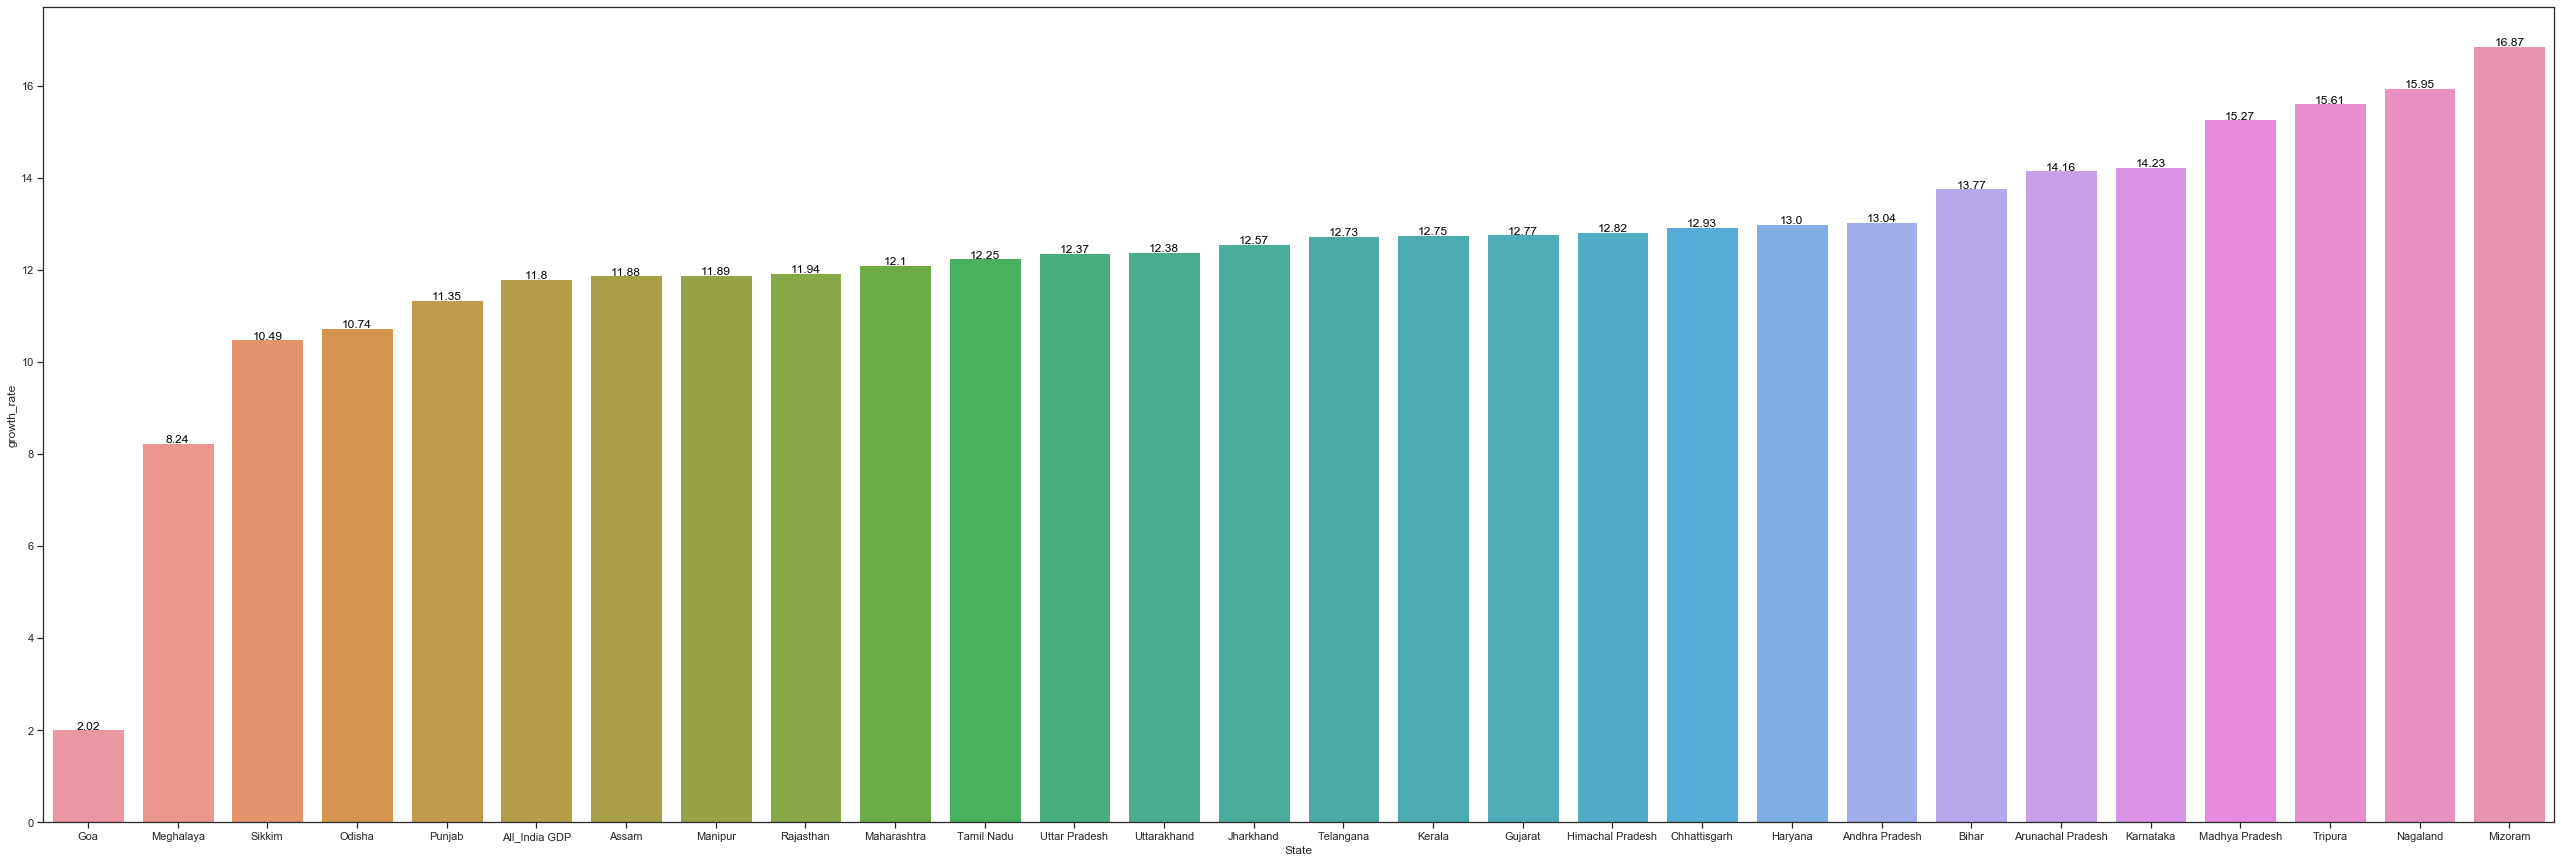

In [55]:
groupedvalues = growthplot.groupby('State').sum().reset_index()
groupedvalues=groupedvalues.sort_values(by='growth_rate').reset_index()
groupedvalues.head()
plt.figure(figsize=(45, 15))
g=sns.barplot(x='State',y='growth_rate',data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.growth_rate, round(row.growth_rate,2), color='black', ha="center")

In [56]:
groupedvalues.nlargest(3,'growth_rate')[['State','growth_rate']] # Top 3 fastest growing States

Items Description,State,growth_rate
27,Mizoram,16.866667
26,Nagaland,15.953333
25,Tripura,15.613333


In [57]:
groupedvalues.nsmallest(3,'growth_rate')[['State','growth_rate']] # Top 3 slowest growing states

Items Description,State,growth_rate
0,Goa,2.0200
1,Meghalaya,8.2440
2,Sikkim,10.4925


##### Plot the total GDP of the states for the year 2015-16:

##### Which Plot will you use for this? Why? (Remeber to plot the graph in a way such as it is easier to read and compare)

##### Identify the top 5 and the bottom 5 states based on total GDP.

##### What insights can you draw from this graph? What states are performing poorly? (Remember: this will not be solely based on total GDP)

In [58]:
# Data for Duration of 2015-16
gdp_2015_16= gsdp_data.iloc[[4],[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
gdp_2015_16

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
4,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,241955.0,...,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,13675331.0


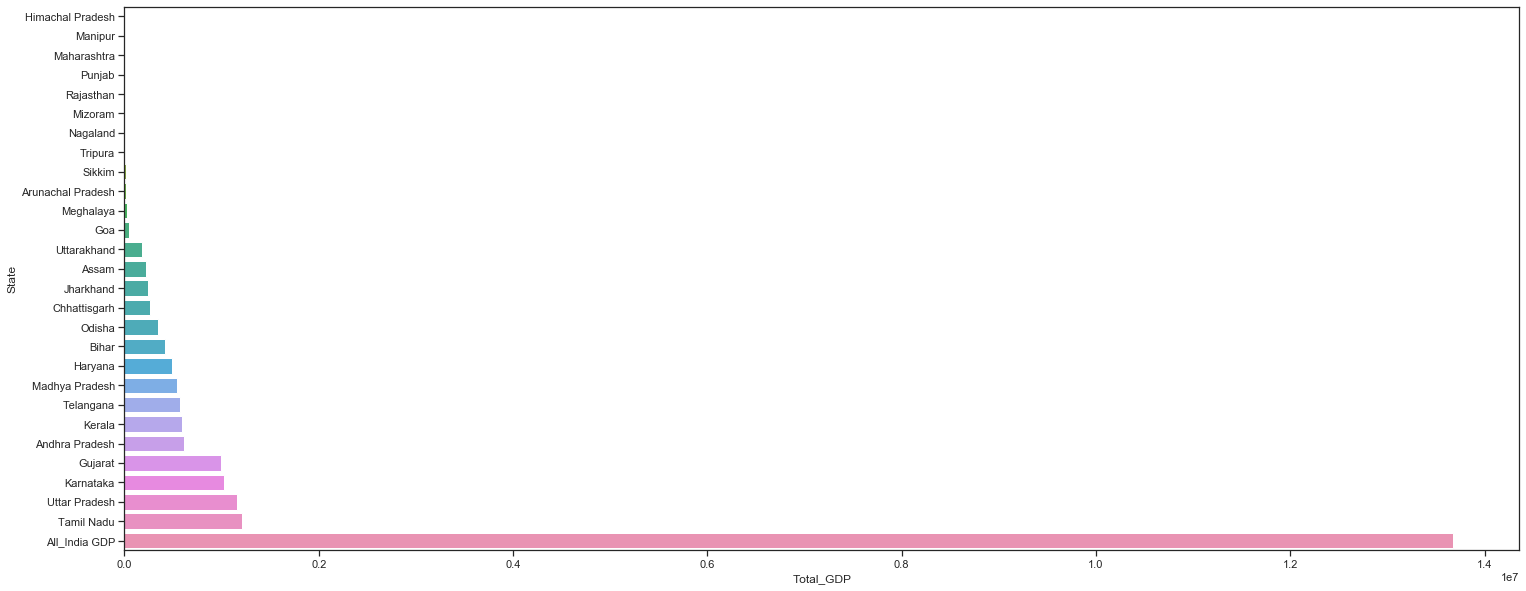

In [59]:
total_gdp=gdp_2015_16.transpose()
total_gdp=total_gdp.reset_index()
total_gdp=total_gdp.rename(columns={4:'Total_GDP','index':'State'})
groupedvalues = total_gdp.groupby('State').sum().reset_index()
groupedvalues=groupedvalues.sort_values('Total_GDP').reset_index()
#groupedvalues.head()
plt.figure(figsize=(25,10))
ax=sns.barplot(x="Total_GDP",y="State",data=groupedvalues)

In [60]:
groupedvalues.nlargest(6,'Total_GDP')[['State','Total_GDP']]  # Top 5 States based on total GDP, excluding All_India GDP

,State,Total_GDP
27,All_India GDP,13675331.0
26,Tamil Nadu,1212668.0
25,Uttar Pradesh,1153795.0
24,Karnataka,1027068.0
23,Gujarat,994316.0
22,Andhra Pradesh,609934.0


In [61]:
groupedvalues.nsmallest(5,'Total_GDP')[['State','Total_GDP']]  # Bottom 5 states based on total GDP

,State,Total_GDP
0,Himachal Pradesh,0.0
1,Manipur,0.0
2,Maharashtra,0.0
3,Punjab,0.0
4,Rajasthan,0.0


#### Part I-B:

##### Data I-B: This dataset contains the distribution of GSDP among three sectors: the primary sector (agriculture), the secondary sector (industry) and the tertiary sector (services) along with taxes and subsidies. There is separate dataset for each of the states. You are expected to read the dataset for the available states and join these (in Python) if needed.

##### Using Data I-B along with Data I-A if required. Performing the analysis only for the duration 2014-15. 

In [62]:
gsva_data.columns

Index(['Agriculture, forestry and fishing', 'Crops', 'Livestock',
       'Forestry and logging', 'Fishing and aquaculture',
       'Mining and quarrying', 'Primary', 'Manufacturing',
       'Electricity, gas, water supply & other utility services',
       'Construction', 'Secondary', 'Trade, repair, hotels and restaurants',
       'Trade & repair services', 'Hotels & restaurants',
       'Transport, storage, communication & services related to broadcasting',
       'Railways', 'Road transport', 'Water transport', 'Air transport',
       'Services incidental to transport', 'Storage',
       'Communication & services related to broadcasting',
       'Financial services',
       'Real estate, ownership of dwelling & professional services',
       'Public administration', 'Other services', 'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       'Population ('00)', 'Per Capita GSDP (Rs.)', 'State',
       '

In [63]:
# Returns a Series of State from the gsva_data DataFrame.

gsva_data['State']   

0     Andaman_Nicobar_Islands
1              Andhra_Pradesh
2           Arunachal_Pradesh
3                       Assam
4                       Bihar
5                  Chandigarh
6                Chhattisgarh
7                       Delhi
8                         Goa
9                     Gujarat
10                    Haryana
11           Himachal_Pradesh
12              Jammu_Kashmir
13                  Jharkhand
14                  Karnataka
15                     Kerala
16             Madhya_Pradesh
17                Maharashtra
18                    Manipur
19                  Meghalaya
20                    Mizoram
21                   Nagaland
22                     Odisha
23                 Puducherry
24                     Punjab
25                  Rajasthan
26                     Sikkim
27                 Tamil_Nadu
28                  Telangana
29                    Tripura
30                Uttarakhand
31              Uttar_Pradesh
Name: State, dtype: object

In [64]:
# Storing all the Union Territories from the gsva_data- as given in the column_name, as a list.
union_territories1=['Jammu_Kashmir','Delhi','Chandigarh','Andaman_Nicobar_Islands','Puducherry']
union_territories1

['Jammu_Kashmir',
 'Delhi',
 'Chandigarh',
 'Andaman_Nicobar_Islands',
 'Puducherry']

In [65]:
# Used here is pandas.Series.isin, it checks whether values are contained in Series. But here we have added not operator '~'
# So it will return all those values that are not in the Series.

gsva_data=gsva_data[~gsva_data.State.isin(union_territories1)]
gsva_data

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
1,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,...,5512100,1690800,52646842,501510,104977,Andhra_Pradesh,NaN,NaN,NaN,NaN
2,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,...,70099,30272,1676119,14870,112718,Arunachal_Pradesh,NaN,NaN,NaN,NaN
3,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,...,1725309,582406,19809800,326780,60621,Assam,NaN,NaN,NaN,NaN
4,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,...,3213546,2006421,37391988,1101240,33954,Bihar,NaN,NaN,NaN,NaN
6,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,2601791,1332092,23498180,270530,86860,Chhattisgarh,NaN,NaN,NaN,NaN
8,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,527279,61854,4063307,14950,271793,Goa,NaN,NaN,NaN,NaN
9,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,Gujarat,2.74416e+06,NaN,NaN,NaN
10,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,Haryana,NaN,NaN,NaN,NaN
11,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,808256,...,895317,259291,10436879,70840,147330,Himachal_Pradesh,NaN,NaN,NaN,NaN
13,3211065,2094466,562503,445149,108947,2037289,5248354,4114148,337489,1789834,...,2499171,411619,21710718,349660,62091,Jharkhand,NaN,NaN,NaN,NaN


In [66]:
gsva_data.columns.values

array(['Agriculture, forestry and fishing', 'Crops', 'Livestock',
       'Forestry and logging', 'Fishing and aquaculture',
       'Mining and quarrying', 'Primary', 'Manufacturing',
       'Electricity, gas, water supply & other utility services',
       'Construction', 'Secondary',
       'Trade, repair, hotels and restaurants', 'Trade & repair services',
       'Hotels & restaurants',
       'Transport, storage, communication & services related to broadcasting',
       'Railways', 'Road transport', 'Water transport', 'Air transport',
       'Services incidental to transport', 'Storage',
       'Communication & services related to broadcasting',
       'Financial services',
       'Real estate, ownership of dwelling & professional services',
       'Public administration', 'Other services', 'Tertiary',
       'TOTAL GSVA at basic prices', 'Taxes on Products',
       'Subsidies on products', 'Gross State Domestic Product',
       "Population ('00)", 'Per Capita GSDP (Rs.)', 'State',
 

In [67]:
gsva_data[["Population ('00)", 'Per Capita GSDP (Rs.)','State']]


,Population ('00),Per Capita GSDP (Rs.),State
1,501510,104977,Andhra_Pradesh
2,14870,112718,Arunachal_Pradesh
3,326780,60621,Assam
4,1101240,33954,Bihar
6,270530,86860,Chhattisgarh
8,14950,271793,Goa
9,633590,141263,Gujarat
10,266620,164077,Haryana
11,70840,147330,Himachal_Pradesh
13,349660,62091,Jharkhand


In [68]:
gsva_data["gdp_per_capita"]=gsva_data["Per Capita GSDP (Rs.)"]/gsva_data["Population ('00)"]


C:\Users\namro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
gsva_data[["gdp_per_capita","State"]]

,gdp_per_capita,State
1,0.209322,Andhra_Pradesh
2,7.58023,Arunachal_Pradesh
3,0.18551,Assam
4,0.0308325,Bihar
6,0.321073,Chhattisgarh
8,18.1801,Goa
9,0.222956,Gujarat
10,0.615396,Haryana
11,2.07976,Himachal_Pradesh
13,0.177575,Jharkhand


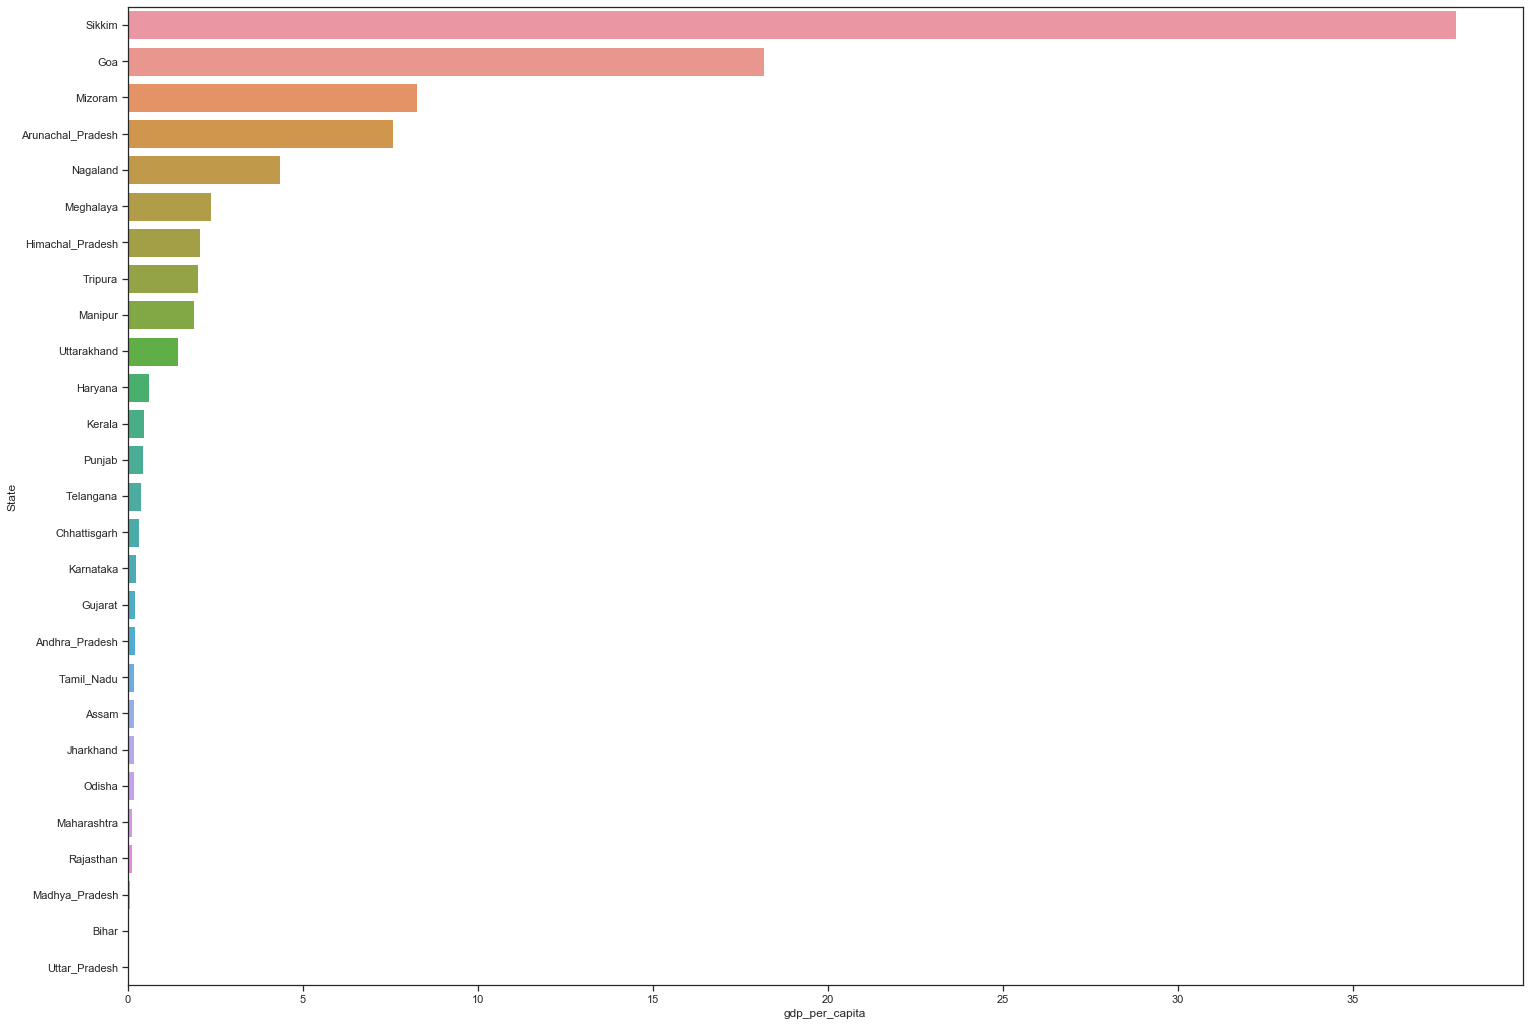

In [70]:
#Plotting States against per capita GSDP
groupedvalues = gsva_data.groupby('State').sum().reset_index()               # Groups the DataFrame based on the states
groupedvalues=groupedvalues.sort_values('gdp_per_capita',ascending=False).reset_index()     # Sorts the value based on gdp_per_capita
#groupedvalues.head()
plt.figure(figsize=(25,18))
sns.barplot(x='gdp_per_capita', y='State', data=groupedvalues)
#ax.legend()           

##### Identify the top 5 and the bottom 5 states based on the GDP per capita.

In [71]:
groupedvalues.nlargest(5,'gdp_per_capita')[['State','gdp_per_capita']]   # Top 5 states in descending order

,State,gdp_per_capita
0,Sikkim,37.957978
1,Goa,18.180134
2,Mizoram,8.255472
3,Arunachal_Pradesh,7.580229
4,Nagaland,4.360438


In [72]:
groupedvalues.nsmallest(5,'gdp_per_capita')[['State','gdp_per_capita']] # Bottom 5 States in ascending oder

,State,gdp_per_capita
26,Uttar_Pradesh,0.023437
25,Bihar,0.030833
24,Madhya_Pradesh,0.082319
23,Rajasthan,0.117566
22,Maharashtra,0.130371


##### Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [73]:
x=groupedvalues.nlargest(1,'gdp_per_capita')['gdp_per_capita']
y=groupedvalues.nsmallest(1,'gdp_per_capita')['gdp_per_capita']
# y returns series: 26    0.023437 with index 26
# x returns series: 0    37.957978 with index 0
# While performing x.divide(y) it returned:
# 0    NaN
# 26   NaN
# Name: gdp_per_capita, dtype: float64
# Hence, passing as param other='0.023437' which is the value of value y, which we already extracted.
#y=0.023437
x.divide(other=0.023437)


0    1619.574941
Name: gdp_per_capita, dtype: float64

##### Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.

In [74]:
contribution_df=gsva_data[['Primary','Secondary','Tertiary','Per Capita GSDP (Rs.)','State']] 
contribution_df

,Primary,Secondary,Tertiary,Per Capita GSDP (Rs.),State
1,16303716,10488884,22032942,104977,Andhra_Pradesh
2,716959,287489,631844,112718,Arunachal_Pradesh
3,5326697,4033091,9307109,60621,Assam
4,8019997,5984896,22179969,33954,Bihar
6,6400817,8238886,7588778,86860,Chhattisgarh
8,312129,1547536,1738217,271793,Goa
9,1.58872e+07,3.30235e+07,3.02204e+07,141263,Gujarat
10,8.04042e+06,1.25614e+07,1.92266e+07,164077,Haryana
11,1548366,4119162,4133326,147330,Himachal_Pradesh
13,5248354,6241471,8133341,62091,Jharkhand


In [75]:
contribution_df['%contribution primary']=(contribution_df['Primary']/contribution_df['Per Capita GSDP (Rs.)'])*100
contribution_df['%contribution secondary']=(contribution_df['Secondary']/contribution_df['Per Capita GSDP (Rs.)'])*100
contribution_df['%contribution tertiary']=(contribution_df['Tertiary']/contribution_df['Per Capita GSDP (Rs.)'])*100

C:\Users\namro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\namro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\namro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [76]:
contribution_df.columns

Index(['Primary', 'Secondary', 'Tertiary', 'Per Capita GSDP (Rs.)', 'State',
       '%contribution primary', '%contribution secondary',
       '%contribution tertiary'],
      dtype='object')

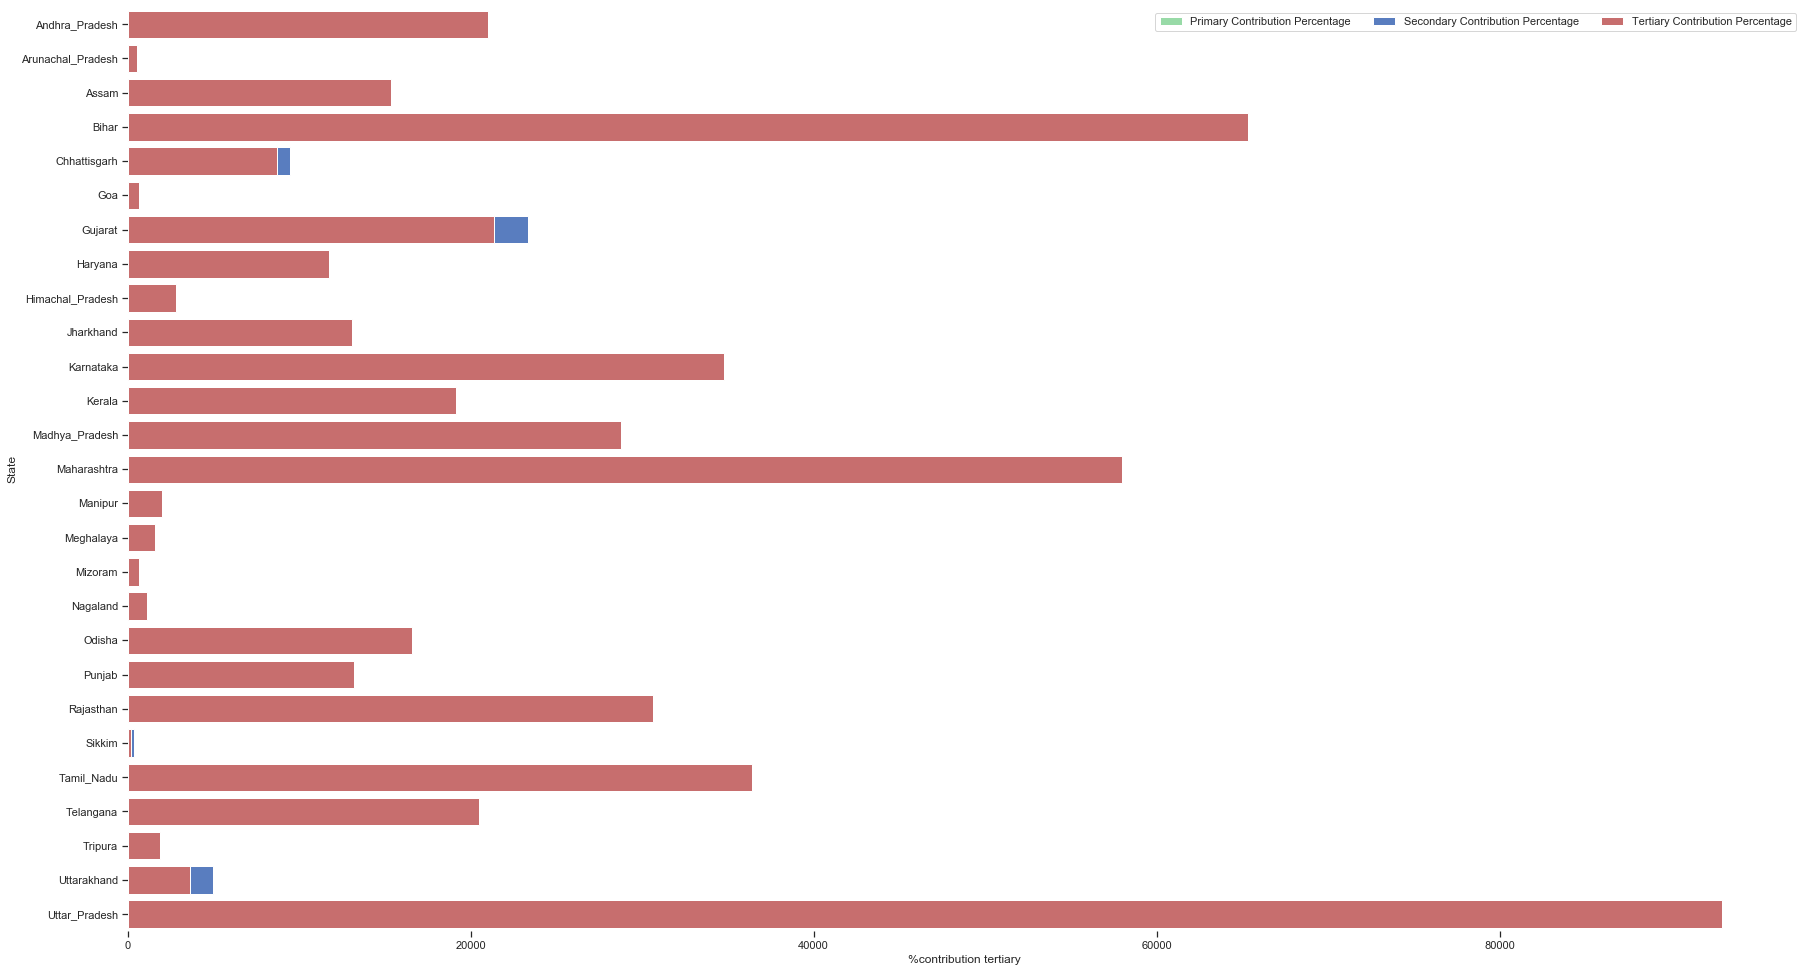

In [77]:
f, ax = plt.subplots(figsize = (30,17))
sns.set_color_codes('pastel')
sns.barplot(x = '%contribution primary', y = 'State', data = contribution_df,
            label = 'Primary Contribution Percentage', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = '%contribution secondary', y = 'State', data = contribution_df,
            label = 'Secondary Contribution Percentage', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = '%contribution tertiary', y = 'State', data = contribution_df,
            label = 'Tertiary Contribution Percentage', color = 'r', edgecolor = 'w')
ax.legend(ncol = 3, loc = 'upper right')
sns.despine(left = True, bottom = True)


In [78]:
df=gsdp_data.iloc[[8],[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]]
df=df.transpose()
df=df.reset_index()
df=df.rename(columns={8:'Total_GDP'})
df=df.iloc[[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
comp=contribution_df.reset_index()
comp['Total_GDP']=df['Total_GDP']
comp['Sum']=comp[['Primary','Secondary','Tertiary']].sum(axis=1)
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 11 columns):
index                      27 non-null int64
Primary                    27 non-null object
Secondary                  27 non-null object
Tertiary                   27 non-null object
Per Capita GSDP (Rs.)      27 non-null object
State                      27 non-null object
%contribution primary      27 non-null object
%contribution secondary    27 non-null object
%contribution tertiary     27 non-null object
Total_GDP                  25 non-null float64
Sum                        27 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 2.4+ KB


##### Why is (Primary + Secondary + Tertiary) not equal to total GDP?

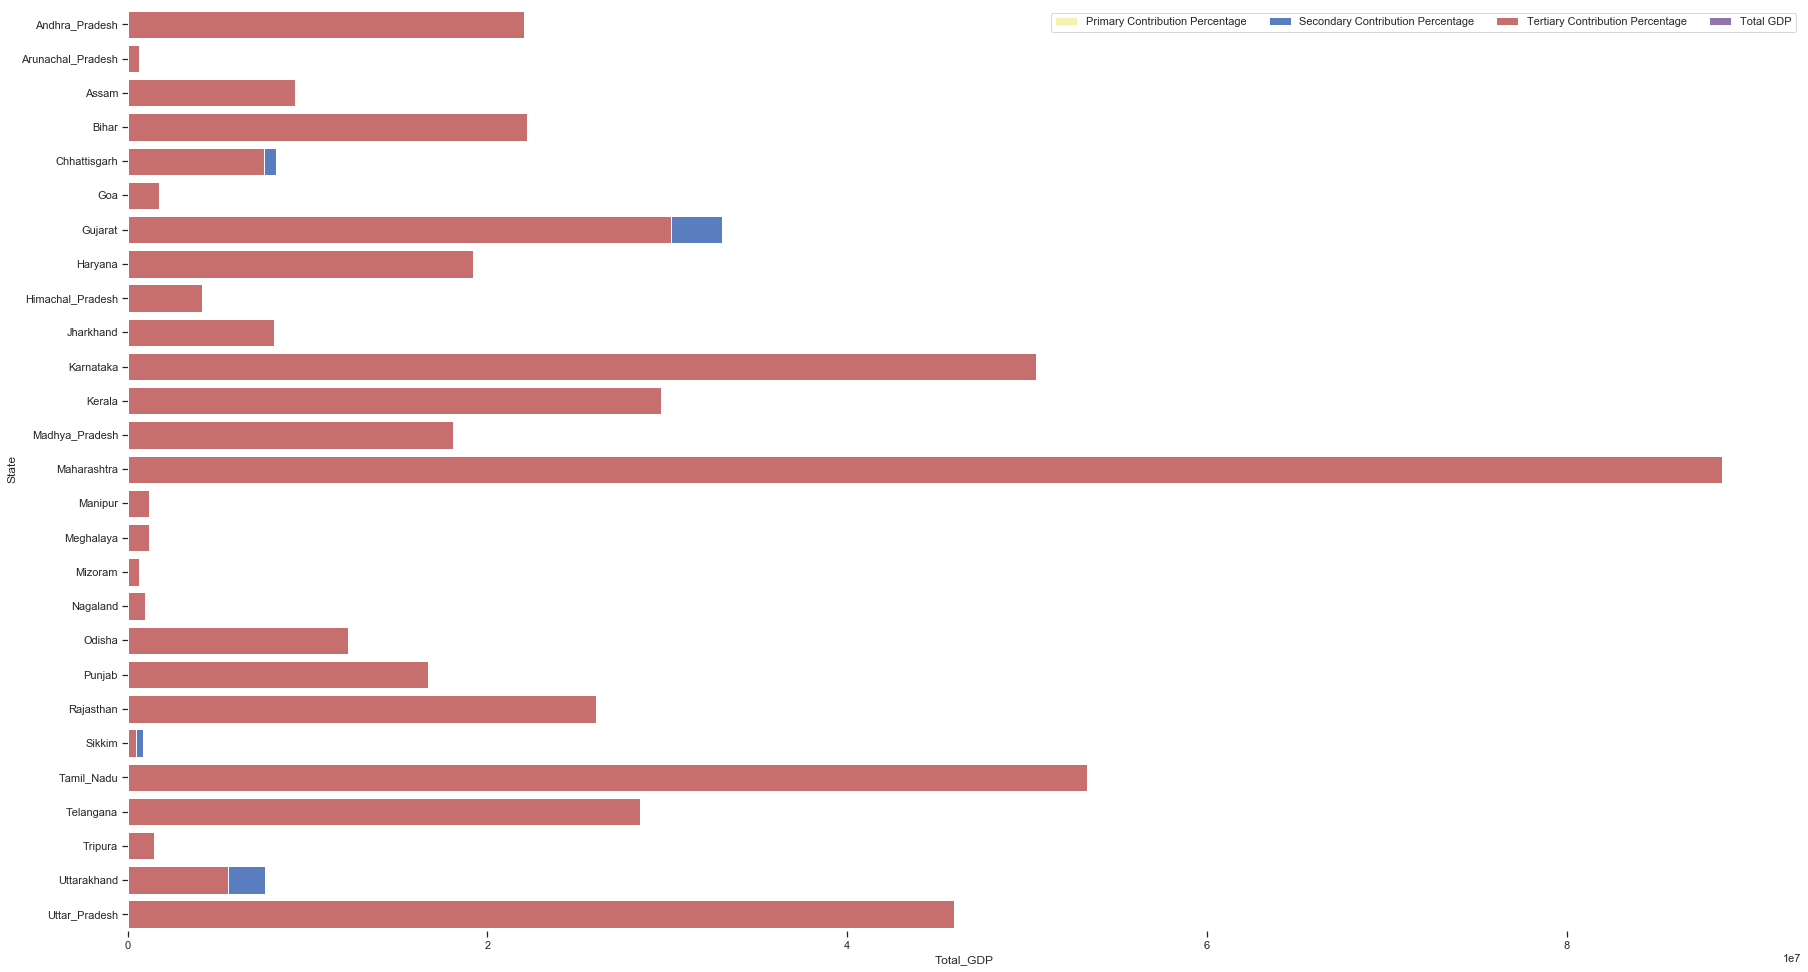

In [79]:
f, ax = plt.subplots(figsize = (30,17))
sns.set_color_codes('pastel')
sns.barplot(x = 'Primary', y = 'State', data = contribution_df,
            label = 'Primary Contribution Percentage', color = 'y', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'Secondary', y = 'State', data = contribution_df,
            label = 'Secondary Contribution Percentage', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'Tertiary', y = 'State', data = contribution_df,
            label = 'Tertiary Contribution Percentage', color = 'r', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'Total_GDP', y = 'State', data = comp,
            label = 'Total GDP', color = 'm', edgecolor = 'w')
ax.legend(ncol = 4, loc = 'upper right')
sns.despine(left = True, bottom = True)

##### Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.

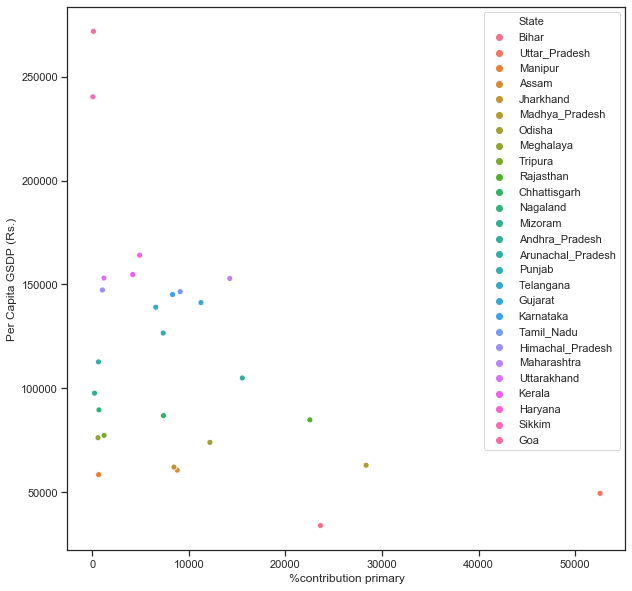

In [80]:
sort_by_per_capita_gsdp=contribution_df.sort_values(by="Per Capita GSDP (Rs.)")
sort_by_per_capita_gsdp=sort_by_per_capita_gsdp[['%contribution primary','Per Capita GSDP (Rs.)','State']]
f, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(x='%contribution primary',y='Per Capita GSDP (Rs.)',data=sort_by_per_capita_gsdp,hue='State',legend='brief')
ax.legend(loc='best')

##### Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [81]:
gsva_data['quartiles1']=gsva_data.gdp_per_capita.rank(pct=True)


C:\Users\namro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
gsva_data #quartiles1 added to the DataFrame

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),State,Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*,gdp_per_capita,quartiles1
1,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,...,52646842,501510,104977,Andhra_Pradesh,NaN,NaN,NaN,NaN,0.209322,0.370370
2,686117,415520,38387,224017,8193,30842,716959,26120,113527,147842,...,1676119,14870,112718,Arunachal_Pradesh,NaN,NaN,NaN,NaN,7.58023,0.888889
3,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,1733568,...,19809800,326780,60621,Assam,NaN,NaN,NaN,NaN,0.18551,0.296296
4,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,3449763,...,37391988,1101240,33954,Bihar,NaN,NaN,NaN,NaN,0.0308325,0.074074
6,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,2669855,...,23498180,270530,86860,Chhattisgarh,NaN,NaN,NaN,NaN,0.321073,0.481481
8,308507,140421,30141,15744,122201,3622,312129,1177608,204110,165819,...,4063307,14950,271793,Goa,NaN,NaN,NaN,NaN,18.1801,0.962963
9,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,5.52602e+06,...,8.95027e+07,633590,141263,Gujarat,2.74416e+06,NaN,NaN,NaN,0.222956,0.407407
10,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,3.70257e+06,...,4.37462e+07,266620,164077,Haryana,NaN,NaN,NaN,NaN,0.615396,0.629630
11,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,808256,...,10436879,70840,147330,Himachal_Pradesh,NaN,NaN,NaN,NaN,2.07976,0.777778
13,3211065,2094466,562503,445149,108947,2037289,5248354,4114148,337489,1789834,...,21710718,349660,62091,Jharkhand,NaN,NaN,NaN,NaN,0.177575,0.259259


In [83]:
#Sub Sector of Primary
gsva_data[['State','Agriculture, forestry and fishing', 'Crops', 'Livestock',
       'Forestry and logging', 'Fishing and aquaculture',
       'Mining and quarrying','quartiles1']]

,State,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,quartiles1
1,Andhra_Pradesh,14819416,7893514,4309078,346160,2270664,1484300,0.370370
2,Arunachal_Pradesh,686117,415520,38387,224017,8193,30842,0.888889
3,Assam,3855548,2890544,173478,261987,529539,1471149,0.296296
4,Bihar,7951890,4688237,2060296,550132,653224,68107,0.074074
6,Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,0.481481
8,Goa,308507,140421,30141,15744,122201,3622,0.962963
9,Gujarat,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,0.407407
10,Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,0.629630
11,Himachal_Pradesh,1514981,853758,110304,540950,9968,33385,0.777778
13,Jharkhand,3211065,2094466,562503,445149,108947,2037289,0.259259


In [84]:
#Sub Sector of Secondary
gsva_data[['State','Manufacturing','Electricity, gas, water supply & other utility services','Construction','quartiles1']]

,State,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,quartiles1
1,Andhra_Pradesh,4672266,1151729,4664889,0.370370
2,Arunachal_Pradesh,26120,113527,147842,0.888889
3,Assam,2002936,296587,1733568,0.296296
4,Bihar,2189965,345168,3449763,0.074074
6,Chhattisgarh,4370593,1198438,2669855,0.481481
8,Goa,1177608,204110,165819,0.962963
9,Gujarat,2.40875e+07,3.40998e+06,5.52602e+06,0.407407
10,Haryana,7.75692e+06,1.10192e+06,3.70257e+06,0.629630
11,Himachal_Pradesh,2543637,767268,808256,0.777778
13,Jharkhand,4114148,337489,1789834,0.259259


In [85]:
# Sub Sector Tertiary
gsva_data[['State','Trade, repair, hotels and restaurants',
       'Trade & repair services', 'Hotels & restaurants',
       'Transport, storage, communication & services related to broadcasting',
       'Railways', 'Road transport', 'Water transport', 'Air transport',
       'Services incidental to transport', 'Storage',
       'Communication & services related to broadcasting',
       'Financial services',
       'Real estate, ownership of dwelling & professional services',
       'Public administration', 'Other services','quartiles1']]

,State,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services related to broadcasting",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,quartiles1
1,Andhra_Pradesh,4233400,3716000,517400,5076984,424228,2816000,94200,14900,780200,18700,928756,1900863,4405409,2200897,4215389,0.370370
2,Arunachal_Pradesh,60421,56796,3625,35203,59,15467,0,0,109,0,19568,25207,48418,243867,218728,0.888889
3,Assam,2987155,2876251,110904,1194568,252509,507668,4502,26223,35739,10308,357619,543651,1412466,1373611,1795658,0.296296
4,Bihar,7448373,7081391,366982,3147173,462413,1572288,2228,13599,166600,10618,919427,1178022,3740641,2078171,4587589,0.074074
6,Chhattisgarh,1535571,1414164,121407,871770,159176,386628,0,9507,5232,16675,294552,739057,2462166,867982,1112232,0.481481
8,Goa,380927,343492,37434,189656,15649,46171,17820,46359,19272,357,44028,233618,407099,346486,180431,0.962963
9,Gujarat,1.01787e+07,1.01787e+07,NaN,4.55591e+06,511593,NaN,NaN,NaN,NaN,57634,1.24252e+06,4.60664e+06,5.1795e+06,2.5762e+06,3.12341e+06,0.407407
10,Haryana,4.98632e+06,4.81778e+06,168535,2.56062e+06,423873,1.45236e+06,NaN,NaN,190269,14459,479658,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,0.629630
11,Himachal_Pradesh,615496,494162,121333,552234,2528,349608,0,3979,1724,129,194266,362521,1125937,553974,923164,0.777778
13,Jharkhand,1991359,1840196,151163,1470022,472702,649648,0,6716,17436,306,323214,551441,1656784,1088325,1375410,0.259259


In [86]:
#gsva_data.groupby('').quantile([0.20,0.5,0.85,1],interpolation='nearest')
gsva_data['gdp_per_capita'].quantile([0.20,0.5,0.85,1])

0.20      0.1715
0.50    0.378162
0.85     4.68242
1.00      37.958
Name: gdp_per_capita, dtype: object

## Part-II: GDP and Education Dropout Rates

##### Reading the required csv file

In [99]:
dropout_df=pd.read_csv('rs_session243_au570_1.1.csv',encoding=' ISO-8859-1')


In [100]:
dropout_df.shape  #Rows and columns of the csv files

(37, 14)

In [101]:
dropout_df.info() #Summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
Sl. No.                         37 non-null object
Level of Education - State      37 non-null object
Primary - 2012-2013             29 non-null float64
Primary - 2014-2015             33 non-null float64
Primary - 2014-2015.1           31 non-null float64
Upper Primary - 2012-2013       31 non-null float64
Upper Primary - 2013-2014       35 non-null float64
Upper Primary - 2014-2015       35 non-null float64
Secondary - 2012-2013           34 non-null float64
Secondary - 2013-2014           36 non-null float64
Secondary - 2014-2015           36 non-null float64
Senior Secondary - 2012-2013    24 non-null float64
Senior Secondary - 2013-2014    27 non-null float64
Senior Secondary - 2014-2015    28 non-null float64
dtypes: float64(12), object(2)
memory usage: 4.1+ KB


In [102]:
dropout_df.columns #Info of all the columns

Index(['Sl. No.', 'Level of Education - State', 'Primary - 2012-2013',
       'Primary - 2014-2015', 'Primary - 2014-2015.1',
       'Upper Primary - 2012-2013', 'Upper Primary - 2013-2014',
       'Upper Primary - 2014-2015', 'Secondary - 2012-2013',
       'Secondary - 2013-2014', 'Secondary - 2014-2015',
       'Senior Secondary - 2012-2013', 'Senior Secondary - 2013-2014',
       'Senior Secondary - 2014-2015'],
      dtype='object')

In [103]:
dropout_df.describe() # statistical summary of the DataFrame

,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
count,29.000000,33.000000,31.000000,31.000000,35.000000,35.000000,34.000000,36.000000,36.000000,24.000000,27.000000,28.000000
mean,5.354138,4.919394,4.480323,4.277742,4.284571,3.992571,16.602353,18.240556,17.294806,7.839583,8.573333,8.420714
std,5.095706,4.990541,3.767533,3.876914,3.386170,2.639329,9.845958,9.045469,6.912640,5.039742,4.712342,8.091123
min,0.340000,0.200000,0.370000,0.100000,0.510000,0.070000,5.320000,7.200000,6.070000,0.350000,1.540000,0.470000
25%,1.990000,1.210000,1.375000,1.235000,2.530000,1.890000,9.697500,12.432500,12.095000,4.317500,5.125000,3.092500
50%,4.060000,3.070000,3.050000,3.380000,3.780000,3.850000,13.640000,16.395000,16.330000,8.115000,7.830000,6.940000
75%,7.070000,7.080000,6.655000,5.495000,5.570000,5.625000,20.690000,23.745000,22.410000,10.810000,12.350000,10.852500
max,24.110000,19.410000,15.360000,19.280000,17.860000,10.510000,49.860000,49.480000,32.270000,18.290000,17.070000,40.480000


In [104]:
dropout_df

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.870,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.710,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.110,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.060,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.900,NaN,NaN,NaN
5,6,Chandigarh,NaN,NaN,NaN,0.10,1.08,0.44,NaN,NaN,NaN,13.65,11.28,10.55
6,7,Chhatisgarh,4.14,1.42,2.91,5.42,3.80,5.85,14.86,23.41,21.260,NaN,NaN,2.76
7,8,Dadra & Nagar Haveli,NaN,1.57,1.47,3.38,4.13,4.02,24.41,28.59,16.770,9.65,6.24,9.47
8,9,Daman & Diu,NaN,0.85,1.11,NaN,3.58,3.11,11.52,19.86,32.270,1.26,9.86,40.48
9,10,Delhi,NaN,NaN,NaN,NaN,2.78,0.76,5.32,8.90,11.810,14.47,16.25,17.32


In [105]:
dropout_df=dropout_df.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36],[1,3,7,10,13]]
dropout_df

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
0,A & N Islands,1.21,1.69,9.870,16.93
1,Andhra Pradesh,4.35,5.20,15.710,NaN
2,Arunachal Pradesh,10.89,6.71,17.110,18.42
3,Assam,7.44,10.51,27.060,NaN
4,Bihar,2.09,4.08,25.900,NaN
5,Chandigarh,NaN,0.44,NaN,10.55
6,Chhatisgarh,1.42,5.85,21.260,2.76
7,Dadra & Nagar Haveli,1.57,4.02,16.770,9.47
8,Daman & Diu,0.85,3.11,32.270,40.48
9,Delhi,NaN,0.76,11.810,17.32


In [115]:
not_included_states=['Jammu_Kashmir','Delhi','Chandigarh','A & N Islands','Puducherry','West Bengal','Dadra & Nagar Haveli','Lakshadweep']
not_included_states
# West Bengal is included in the list as there are no available data for it.

['Jammu_Kashmir',
 'Delhi',
 'Chandigarh',
 'A & N Islands',
 'Puducherry',
 'West Bengal',
 'Dadra & Nagar Haveli',
 'Lakshadweep']

In [116]:
dropout_df=dropout_df[~dropout_df['Level of Education - State'].isin(not_included_states)]
dropout_data= dropout_df.reset_index()
dropout_data.drop(['index'],axis=1,inplace=True)
dropout_data

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
0,Andhra Pradesh,4.35,5.20,15.71,NaN
1,Arunachal Pradesh,10.89,6.71,17.11,18.42
2,Assam,7.44,10.51,27.06,NaN
3,Bihar,2.09,4.08,25.90,NaN
4,Chhatisgarh,1.42,5.85,21.26,2.76
5,Daman & Diu,0.85,3.11,32.27,40.48
6,Goa,0.20,0.07,11.15,13.91
7,Gujarat,0.76,6.41,25.04,7.04
8,Haryana,0.41,5.81,15.89,5.75
9,Himachal Pradesh,0.46,0.87,6.07,7.41


In [117]:
dropout_data['Level of Education - State'].values

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhatisgarh', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttrakhand', 'All India'], dtype=object)

In [121]:
#Adding %contibution of Primary, Secondary, and Tertiary sector columns and gdp_per_capita column.
#List of states in the GSVA data
lis = ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura','Uttar Pradesh','Uttarakhand']

#dropout_data = dropout[dropout['Level of Education - State'].isin(lis)]
#dropout_data['contribution primary']=contribution_df['%contribution primary']
#dropout_data['contribution secondary']=contribution_df['%contribution secondary']
#dropout_data['contribution tertiary']= contribution_df['%contribution tertiary']
dropout_data['gdp_per_capita']=gsva_data['gdp_per_capita']
contribution=contribution_df[['%contribution primary','%contribution secondary','%contribution tertiary']]
contribution=contribution.reset_index()
dropout_data[['contribution primary','contribution secondary','contribution tertiary']]= contribution[['%contribution primary', '%contribution secondary',
       '%contribution tertiary']]


In [122]:
#dropout_data.info()
# Coverting the type of the columns from object to the numeric.
dropout_data["contribution primary"]=pd.to_numeric(dropout_data["contribution primary"],errors='ignore')
dropout_data["contribution secondary"]=pd.to_numeric(dropout_data["contribution primary"],errors='ignore')
dropout_data["contribution tertiary"]=pd.to_numeric(dropout_data["contribution primary"],errors='ignore')
dropout_data['gdp_per_capita']=pd.to_numeric(dropout_data['gdp_per_capita'],errors='ignore')


In [123]:
dropout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
Level of Education - State      30 non-null object
Primary - 2014-2015             29 non-null float64
Upper Primary - 2014-2015       28 non-null float64
Secondary - 2014-2015           30 non-null float64
Senior Secondary - 2014-2015    21 non-null float64
contribution primary            27 non-null float64
contribution secondary          27 non-null float64
contribution tertiary           27 non-null float64
gdp_per_capita                  25 non-null float64
dtypes: float64(8), object(1)
memory usage: 2.2+ KB


##### Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.


In [124]:
corr=dropout_data.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015,contribution primary,contribution secondary,contribution tertiary,gdp_per_capita
Primary - 2014-2015,1,0.45,0.053,-0.035,-0.16,-0.16,-0.16,-0.18
Upper Primary - 2014-2015,0.45,1,0.46,-0.046,-0.25,-0.25,-0.25,-0.056
Secondary - 2014-2015,0.053,0.46,1,0.44,0.4,0.4,0.4,0.41
Senior Secondary - 2014-2015,-0.035,-0.046,0.44,1,-0.13,-0.13,-0.13,0.13
contribution primary,-0.16,-0.25,0.4,-0.13,1,1,1,0.72
contribution secondary,-0.16,-0.25,0.4,-0.13,1,1,1,0.72
contribution tertiary,-0.16,-0.25,0.4,-0.13,1,1,1,0.72
gdp_per_capita,-0.18,-0.056,0.41,0.13,0.72,0.72,0.72,1


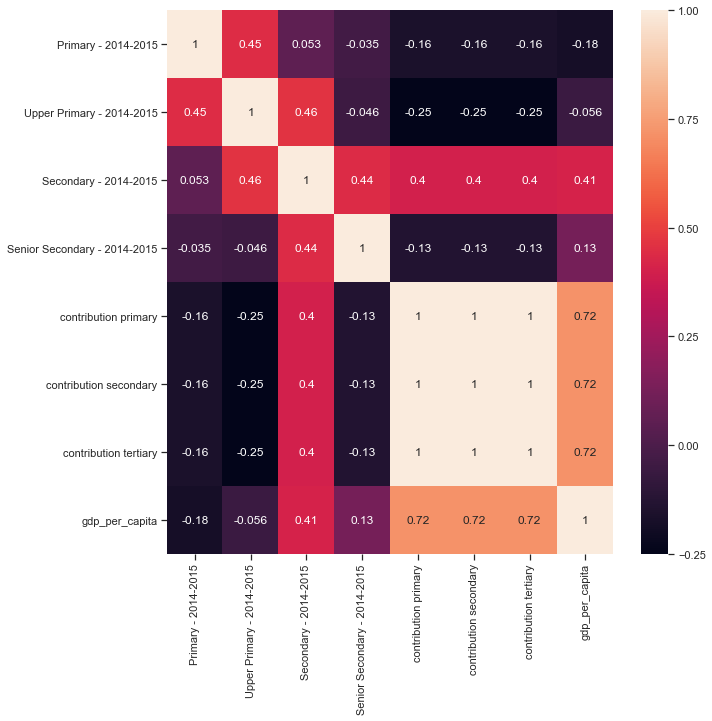

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

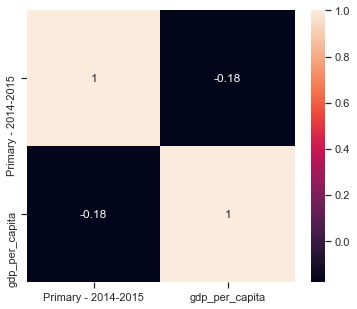

In [126]:
corr= dropout_data[['Level of Education - State','Primary - 2014-2015','gdp_per_capita']].corr(method='pearson')
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True)

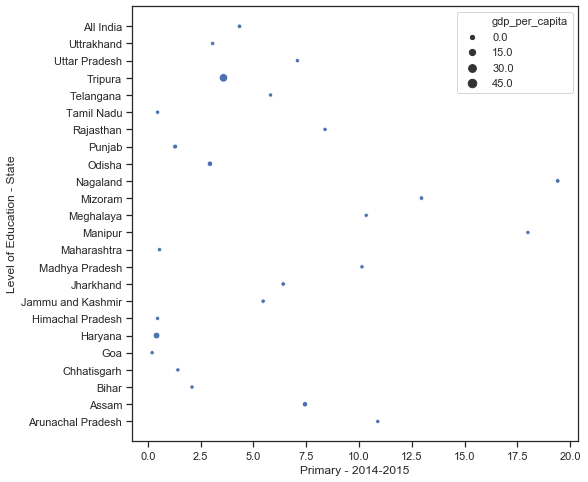

In [127]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x='Primary - 2014-2015',y='Level of Education - State',data=dropout_data,size='gdp_per_capita',palette='colorblind',legend='brief')


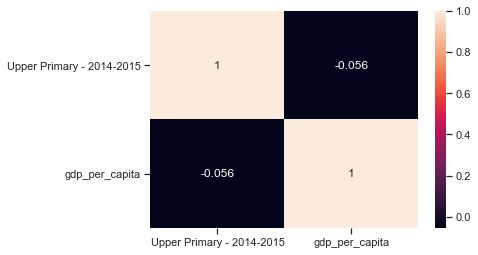

In [128]:
corr= dropout_data[['Level of Education - State','Upper Primary - 2014-2015','gdp_per_capita']].corr(method='pearson')
sns.heatmap(corr,annot=True)

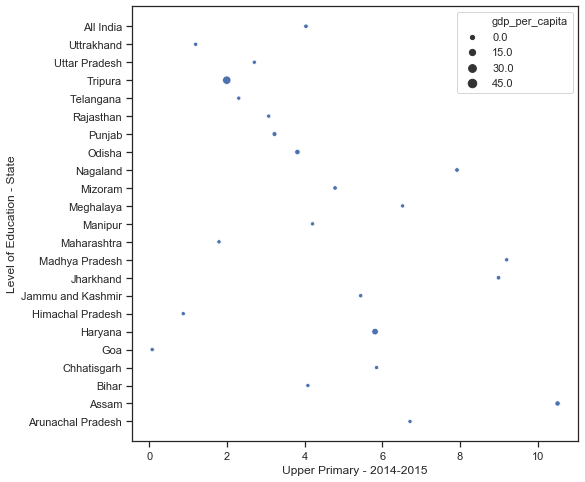

In [129]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x='Upper Primary - 2014-2015',y='Level of Education - State',data=dropout_data,size='gdp_per_capita',palette='colorblind',legend='brief')

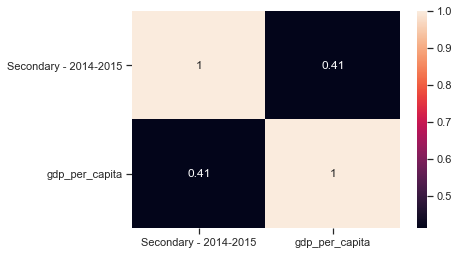

In [130]:
corr= dropout_data[['Level of Education - State','Secondary - 2014-2015','gdp_per_capita']].corr(method='pearson')
sns.heatmap(corr,annot=True)

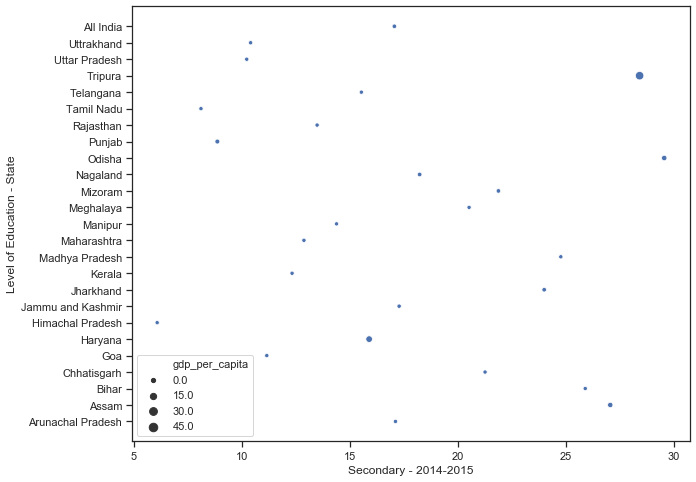

In [131]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x='Secondary - 2014-2015',y='Level of Education - State',data=dropout_data,size='gdp_per_capita',palette='colorblind',legend='brief')

##### Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

In [132]:
df=gsdp_data.iloc[[8],[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]]
df=df.transpose()
df=df.reset_index()
df=df.rename(columns={8:'Total_GDP'})
df=df.iloc[[0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
dropout_data['Total_GDP']=df['Total_GDP']
dropout_data


,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015,contribution primary,contribution secondary,contribution tertiary,gdp_per_capita,Total_GDP
0,Andhra Pradesh,4.35,5.20,15.71,NaN,15530.750545,15530.750545,15530.750545,NaN,13.40
1,Arunachal Pradesh,10.89,6.71,17.11,18.42,636.064338,636.064338,636.064338,0.209322,14.79
2,Assam,7.44,10.51,27.06,NaN,8786.884083,8786.884083,8786.884083,7.580229,11.45
3,Bihar,2.09,4.08,25.90,NaN,23620.183189,23620.183189,23620.183189,0.185510,17.92
4,Chhatisgarh,1.42,5.85,21.26,2.76,7369.119272,7369.119272,7369.119272,0.030833,NaN
5,Daman & Diu,0.85,3.11,32.27,40.48,114.840706,114.840706,114.840706,NaN,13.12
6,Goa,0.20,0.07,11.15,13.91,11246.530939,11246.530939,11246.530939,0.321073,10.82
7,Gujarat,0.76,6.41,25.04,7.04,4900.396765,4900.396765,4900.396765,NaN,9.18
8,Haryana,0.41,5.81,15.89,5.75,1050.950926,1050.950926,1050.950926,18.180134,10.14
9,Himachal Pradesh,0.46,0.87,6.07,7.41,8452.680743,8452.680743,8452.680743,0.222956,4.70


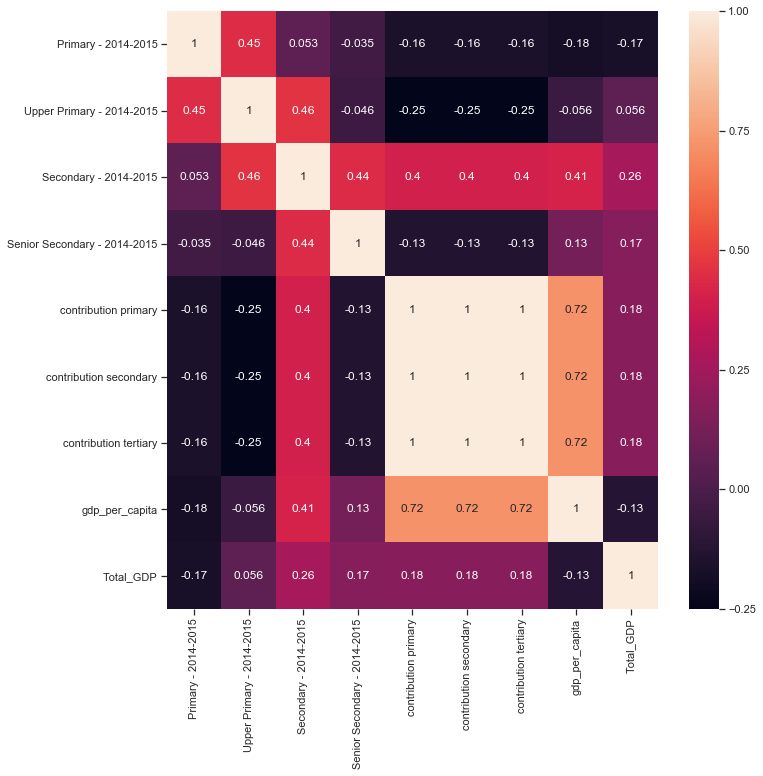

In [133]:
corr=dropout_data.corr(method='pearson')
plt.figure(figsize=(11,11))
sns.heatmap(corr,annot=True)

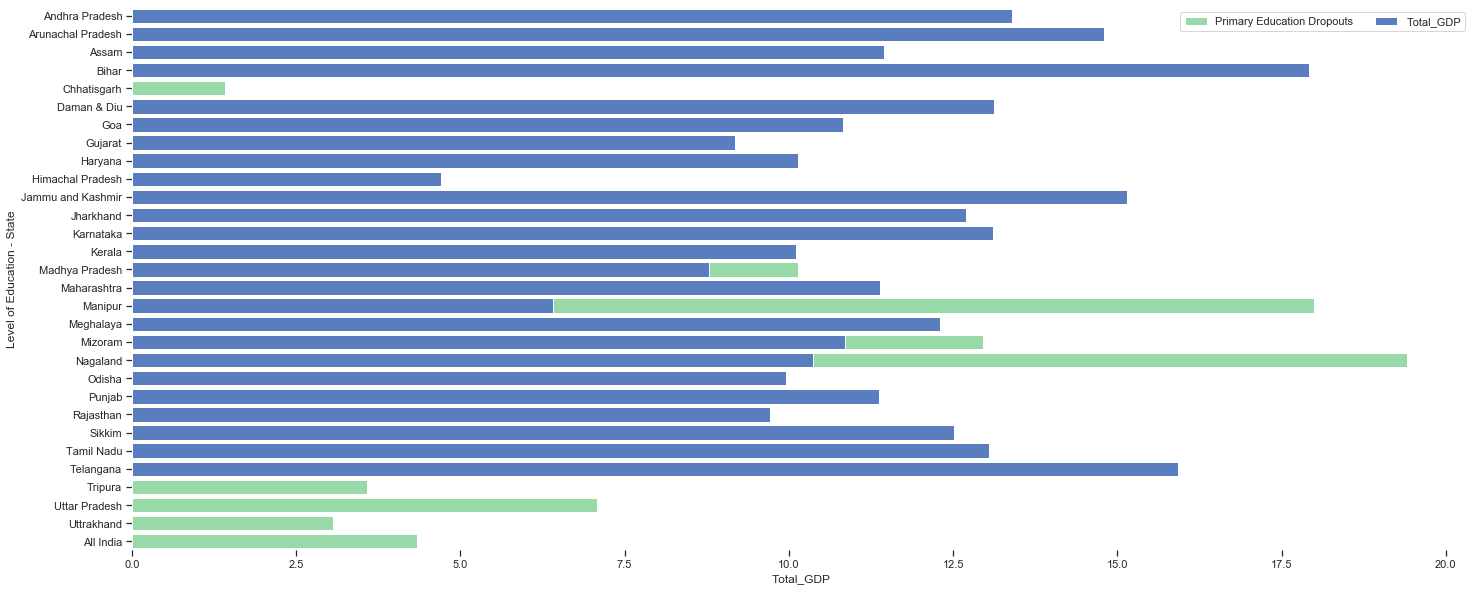

In [134]:
f, ax = plt.subplots(figsize = (24,10))
sns.set_color_codes('pastel')
sns.barplot(x = 'Primary - 2014-2015', y = 'Level of Education - State', data = dropout_data,
            label = 'Primary Education Dropouts', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'Total_GDP', y = 'Level of Education - State', data = dropout_data,
            label = 'Total_GDP', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2,loc='upper right')
sns.despine(left = True, bottom = True)


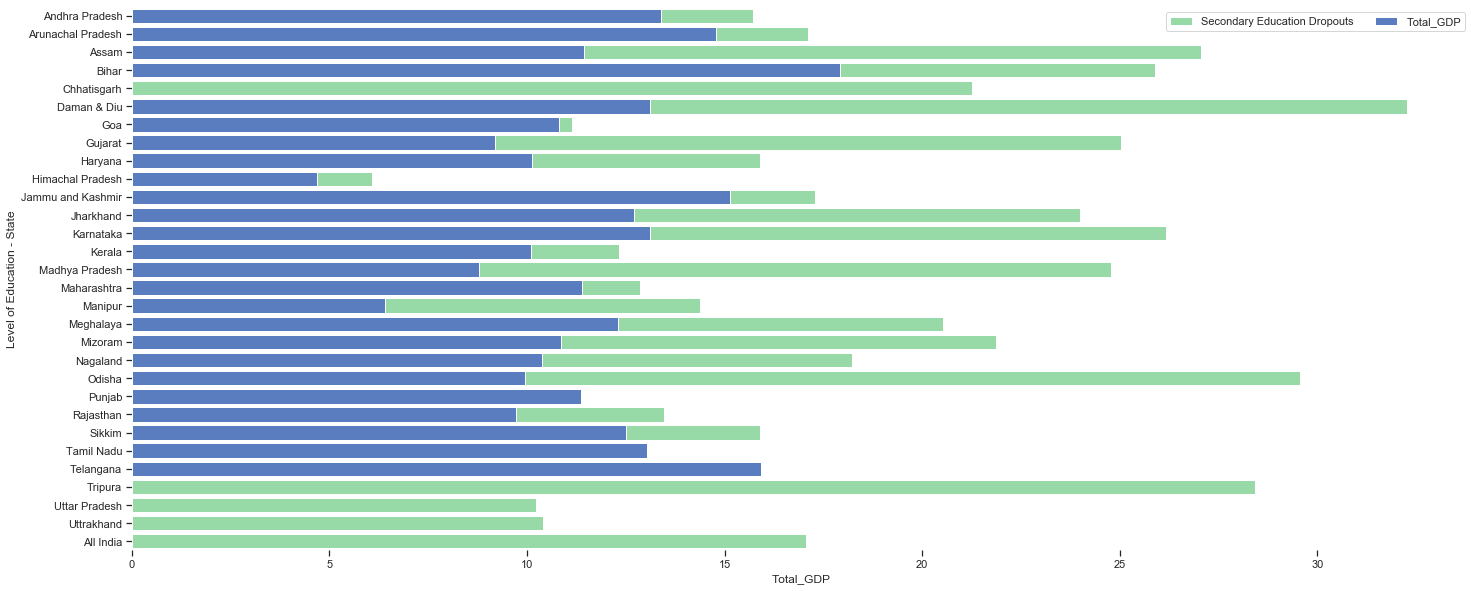

In [135]:
f, ax = plt.subplots(figsize = (24,10))
sns.set_color_codes('pastel')
sns.barplot(x = 'Secondary - 2014-2015', y = 'Level of Education - State', data = dropout_data,
            label = 'Secondary Education Dropouts', color = 'g', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'Total_GDP', y = 'Level of Education - State', data = dropout_data,
            label = 'Total_GDP', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)

In [136]:
population=gsva_data["Population ('00)"]
population=population.reset_index()
dropout_data['Population']=population["Population ('00)"]
dropout_data

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015,contribution primary,contribution secondary,contribution tertiary,gdp_per_capita,Total_GDP,Population
0,Andhra Pradesh,4.35,5.20,15.71,NaN,15530.750545,15530.750545,15530.750545,NaN,13.40,501510
1,Arunachal Pradesh,10.89,6.71,17.11,18.42,636.064338,636.064338,636.064338,0.209322,14.79,14870
2,Assam,7.44,10.51,27.06,NaN,8786.884083,8786.884083,8786.884083,7.580229,11.45,326780
3,Bihar,2.09,4.08,25.90,NaN,23620.183189,23620.183189,23620.183189,0.185510,17.92,1101240
4,Chhatisgarh,1.42,5.85,21.26,2.76,7369.119272,7369.119272,7369.119272,0.030833,NaN,270530
5,Daman & Diu,0.85,3.11,32.27,40.48,114.840706,114.840706,114.840706,NaN,13.12,14950
6,Goa,0.20,0.07,11.15,13.91,11246.530939,11246.530939,11246.530939,0.321073,10.82,633590
7,Gujarat,0.76,6.41,25.04,7.04,4900.396765,4900.396765,4900.396765,NaN,9.18,266620
8,Haryana,0.41,5.81,15.89,5.75,1050.950926,1050.950926,1050.950926,18.180134,10.14,70840
9,Himachal Pradesh,0.46,0.87,6.07,7.41,8452.680743,8452.680743,8452.680743,0.222956,4.70,349660


##### You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?

In [137]:
#Converting from object to numeric
dropout_data['Population']=pd.to_numeric(dropout_data['Population'],errors='ignore')
dropout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
Level of Education - State      30 non-null object
Primary - 2014-2015             29 non-null float64
Upper Primary - 2014-2015       28 non-null float64
Secondary - 2014-2015           30 non-null float64
Senior Secondary - 2014-2015    21 non-null float64
contribution primary            27 non-null float64
contribution secondary          27 non-null float64
contribution tertiary           27 non-null float64
gdp_per_capita                  25 non-null float64
Total_GDP                       25 non-null float64
Population                      27 non-null float64
dtypes: float64(10), object(1)
memory usage: 2.7+ KB


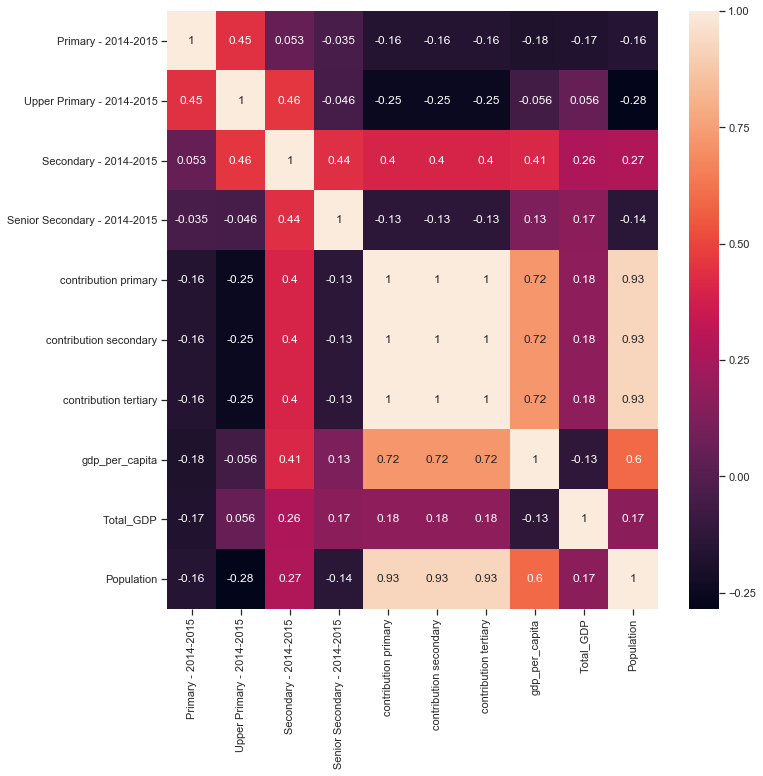

In [138]:
corr=dropout_data.corr(method='pearson')
plt.figure(figsize=(11,11))
sns.heatmap(corr,annot=True)

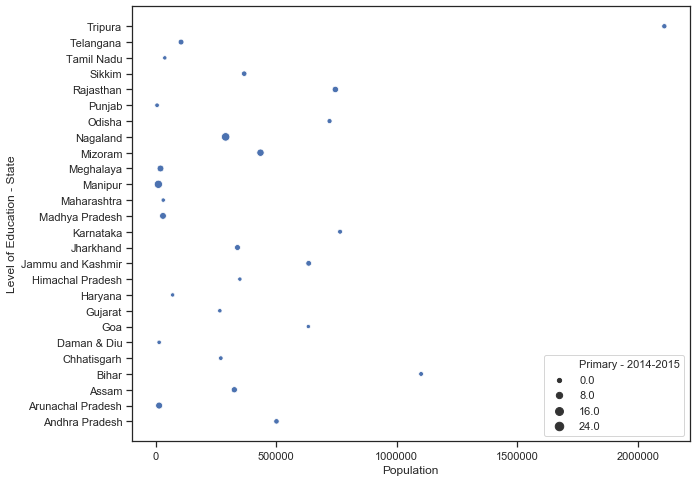

In [139]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x='Population',y='Level of Education - State',data=dropout_data,size='Primary - 2014-2015',palette='colorblind',legend='brief')

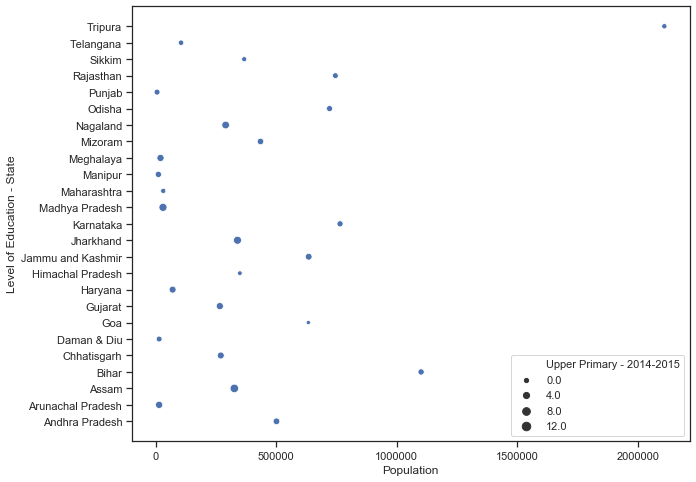

In [140]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x='Population',y='Level of Education - State',data=dropout_data,size='Upper Primary - 2014-2015',palette='colorblind',legend='brief')

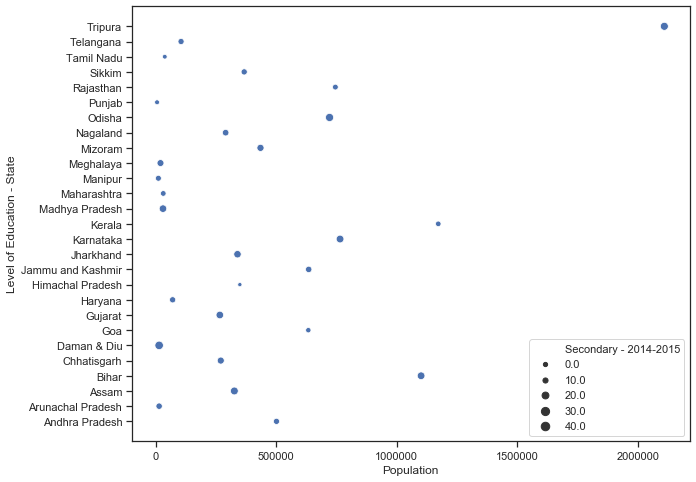

In [141]:
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x='Population',y='Level of Education - State',data=dropout_data,size='Secondary - 2014-2015',palette='colorblind',legend='brief')